In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Loading Dataset and Preprocessing

In [86]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [87]:
df.shape

(32561, 15)

In [88]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  str  
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  str  
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  str  
 6   occupation      32561 non-null  str  
 7   relationship    32561 non-null  str  
 8   race            32561 non-null  str  
 9   sex             32561 non-null  str  
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  str  
 14  income          32561 non-null  str  
dtypes: int64(6), str(9)
memory usage: 3.7 MB


In [89]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [90]:
df['workclass'].unique()

<StringArray>
[               '?',          'Private',        'State-gov',
      'Federal-gov', 'Self-emp-not-inc',     'Self-emp-inc',
        'Local-gov',      'Without-pay',     'Never-worked']
Length: 9, dtype: str

In [91]:
df['occupation'].unique()

<StringArray>
[                '?',   'Exec-managerial', 'Machine-op-inspct',
    'Prof-specialty',     'Other-service',      'Adm-clerical',
      'Craft-repair',  'Transport-moving', 'Handlers-cleaners',
             'Sales',   'Farming-fishing',      'Tech-support',
   'Protective-serv',      'Armed-Forces',   'Priv-house-serv']
Length: 15, dtype: str

In [92]:
df['education'].unique()

<StringArray>
[     'HS-grad', 'Some-college',      '7th-8th',         '10th',
    'Doctorate',  'Prof-school',    'Bachelors',      'Masters',
         '11th',   'Assoc-acdm',    'Assoc-voc',      '1st-4th',
      '5th-6th',         '12th',          '9th',    'Preschool']
Length: 16, dtype: str

In [93]:
df.replace("?",np.nan,inplace=True)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [94]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [95]:
df.dropna(inplace =True)

In [96]:
df.shape

(30162, 15)

In [97]:
y = df['income']
X = df.drop('income',axis=1)

In [98]:
X =pd.get_dummies(X,drop_first= True)

In [99]:
X.shape

(30162, 96)

## Task 1 : Decision Trees – Theory & Implementation

### Gini Impurity vs Entropy
Gini Impurity and Entropy defines the purity of node. It is used to decide the node which should be least impure to perfomr the split.
Gini Impurity tells probability of misclassification. The less the gini impurity is ,the node is more favuorable to split.
Entropy tells the randomness or uncertainity in the node according to the class. Less entropy is good for the split.

### Overfitting in Decision Tree
Overfitting is a common symptom in decision tree. As the tree gets more depth, it tends to capture more variance hence overfits.They create very complex decision boundaries hence dont perform well on test data.

### Role of max_depth, min_samples_split
Max_depth specifies the length of the decision tree from root node to leaf node. The more the depth is the tree becomes more complex and tends to overfit.The less the depth the model is simpler.

min_sample_splits refers to minimum number of samples required to split a node.It controls when a node can be splitted.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =42)

model = DecisionTreeClassifier(max_depth =3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
print(classification_report(y_test, y_pred))

0.8384351862084208
              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90      6754
        >50K       0.77      0.51      0.62      2295

    accuracy                           0.84      9049
   macro avg       0.81      0.73      0.76      9049
weighted avg       0.83      0.84      0.83      9049



## Task 2 : Random Forests & Ensembles

### Bagging
Bagging is an ensemble learning technique which parallely trains many models on different subsets of the datasets and combine the predictions of all the models for predicting final result. Bagging helps reduce overfitting.

### Why Random Forests reduce overfitting 
Since random forest is a bagging technique, it reduces overfitting because a single decision tree has a high variance and is sensitive to small changes but random forest has many tree which overfits differently and averages their prediction which reduces variance.Random feature selection reduces correlation between trees which leads to reduce variance and less overfitting.

### Feature importance
It specifies which features are most important in perdicting the outcome. In tree based models it measures how much a feature reduces impurity when it is used to split data.Features that consistently create large decreases in impurity across many trees are considered more important.

In [101]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 200,max_depth = None)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)

print(acc_rf)
print(classification_report(y_test,y_pred_rf))

0.8469444137473754
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6754
        >50K       0.73      0.63      0.68      2295

    accuracy                           0.85      9049
   macro avg       0.80      0.77      0.79      9049
weighted avg       0.84      0.85      0.84      9049



In [102]:
comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [acc, acc_rf]
})

print(comparison)

           Model  Accuracy
0  Decision Tree  0.838435
1  Random Forest  0.846944


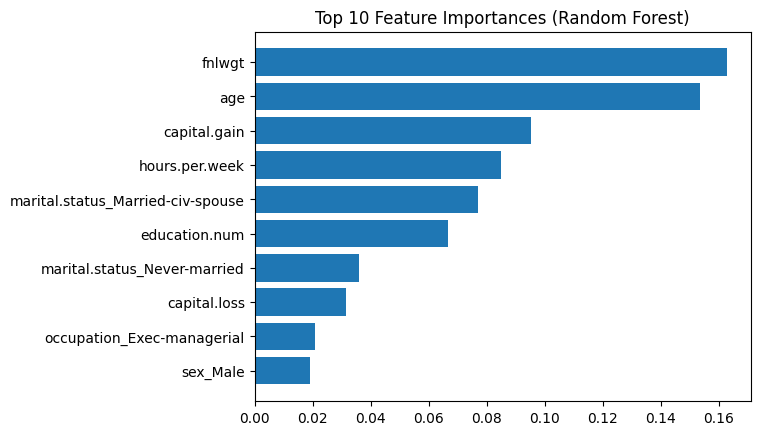

In [103]:
# Get importance
importances = rf_model.feature_importances_

# Create dataframe
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure()
plt.barh(feat_importance['Feature'][:10], feat_importance['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

## Task 3: Gradient Boosting - LightGBM

### Boosting vs Bagging
In Bagging models are trained independently in parallel with different subset of data and average or majority voting is considered for final outcome.The main goal is to reduce variance.
In Boosting the models are trained sequentially.Each model tries to correct the previous model's mistake by focusing more on the wrongly predicted data. The final prediction is the weighted sum of all the models. The main goal is to reduce bias.

### Sequential learning
The main idea of sequential learning is that each new model is trained on the residual errors of the previous model.Hence the model improves step by step.This is the idea used in boosting.

### Learning Rate
Learning Rate contributes how much each new model contributes to the final prediction. If the learning rate is large the model may learn fast but may overfit, if the learning rate is small the models learns slowly but stabelly. 

In [104]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [105]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(n_estimators=200,max_depth=6,learning_rate=0.1,random_state=42,verbose =-1)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
acc_lgb = accuracy_score(y_test,y_pred_lgb)
print("LightGBM Accuracy:",acc_lgb)
print(classification_report(y_test, y_pred_lgb))

LightGBM Accuracy: 0.8697093601502929
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      6754
        >50K       0.79      0.66      0.72      2295

    accuracy                           0.87      9049
   macro avg       0.84      0.80      0.82      9049
weighted avg       0.87      0.87      0.87      9049



In [106]:
comparison_2 = pd.DataFrame({
    'Model': ['Random Forest','Gradient Boosting (LightGBM)'],
    'Accuracy': [acc_rf, acc_lgb]
})

print(comparison_2)

                          Model  Accuracy
0                 Random Forest  0.846944
1  Gradient Boosting (LightGBM)  0.869709


## Task 4: Hyperparameter Tuning &amp; Interpretability

Hyperparameter Tuning using RandomizedSearchCV includes trying of various random combinations of hyperparameter and evaluating them using cross validation to find the best performing model.It is better than GridSearchCV as it explores randomly through the ranges making computation faster.

In [107]:
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here..

In [108]:
print("Best RF Parameters:", rf_random.best_params_)

best_rf = rf_random.best_estimator_

rf_tuned_pred = best_rf.predict(X_test)
acc_rf_tuned = accuracy_score(y_test, rf_tuned_pred)
print("Tuned RF Accuracy:",acc_rf_tuned)
print(classification_report(y_test,rf_tuned_pred))

Best RF Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Tuned RF Accuracy: 0.8567797546690242
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.91      6754
        >50K       0.78      0.60      0.68      2295

    accuracy                           0.86      9049
   macro avg       0.83      0.77      0.79      9049
weighted avg       0.85      0.86      0.85      9049



In [109]:
from lightgbm import LGBMClassifier

lgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 50, 70]
}

lgb = LGBMClassifier(random_state=42, verbosity=-1)

lgb_random = RandomizedSearchCV(estimator=lgb,param_distributions=lgb_params,n_iter=20,cv=3,scoring='accuracy',random_state=42,n_jobs=-1)

lgb_random.fit(X_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LGBMClassifie... verbosity=-1)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'learning_rate': [0.01, 0.05, ...], 'max_depth': [-1, 3, ...], 'n_estimators': [100, 200, ...], 'num_leaves': [20, 31, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... ve

In [110]:
print("Best LGBM Parameters:", lgb_random.best_params_)

best_lgb = lgb_random.best_estimator_

lgb_tuned_pred = best_lgb.predict(X_test)
acc_lgb_tuned =  accuracy_score(y_test, lgb_tuned_pred)
print("Tuned LGBM Accuracy:",acc_lgb_tuned)
print("Classification Report:",classification_report(y_test,lgb_tuned_pred))

Best LGBM Parameters: {'num_leaves': 20, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}
Tuned LGBM Accuracy: 0.8702619073930821
Classification Report:               precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      6754
        >50K       0.79      0.66      0.72      2295

    accuracy                           0.87      9049
   macro avg       0.84      0.80      0.82      9049
weighted avg       0.87      0.87      0.87      9049



### Comparision of all models

In [111]:
comparison_final = pd.DataFrame({
    'Model': ['Decision Tree','Random Forest','LightGBM','Random Forest Tuned','LightGBM Tuned'],
    'Accuracy': [acc,acc_rf, acc_lgb,acc_rf_tuned,acc_lgb_tuned]
})

print(comparison_final)

                 Model  Accuracy
0        Decision Tree  0.838435
1        Random Forest  0.846944
2             LightGBM  0.869709
3  Random Forest Tuned  0.856780
4       LightGBM Tuned  0.870262


#### Tree visualization shows the decision rules and feature splits used by a Decision Tree, making the model’s logic easy to understand.

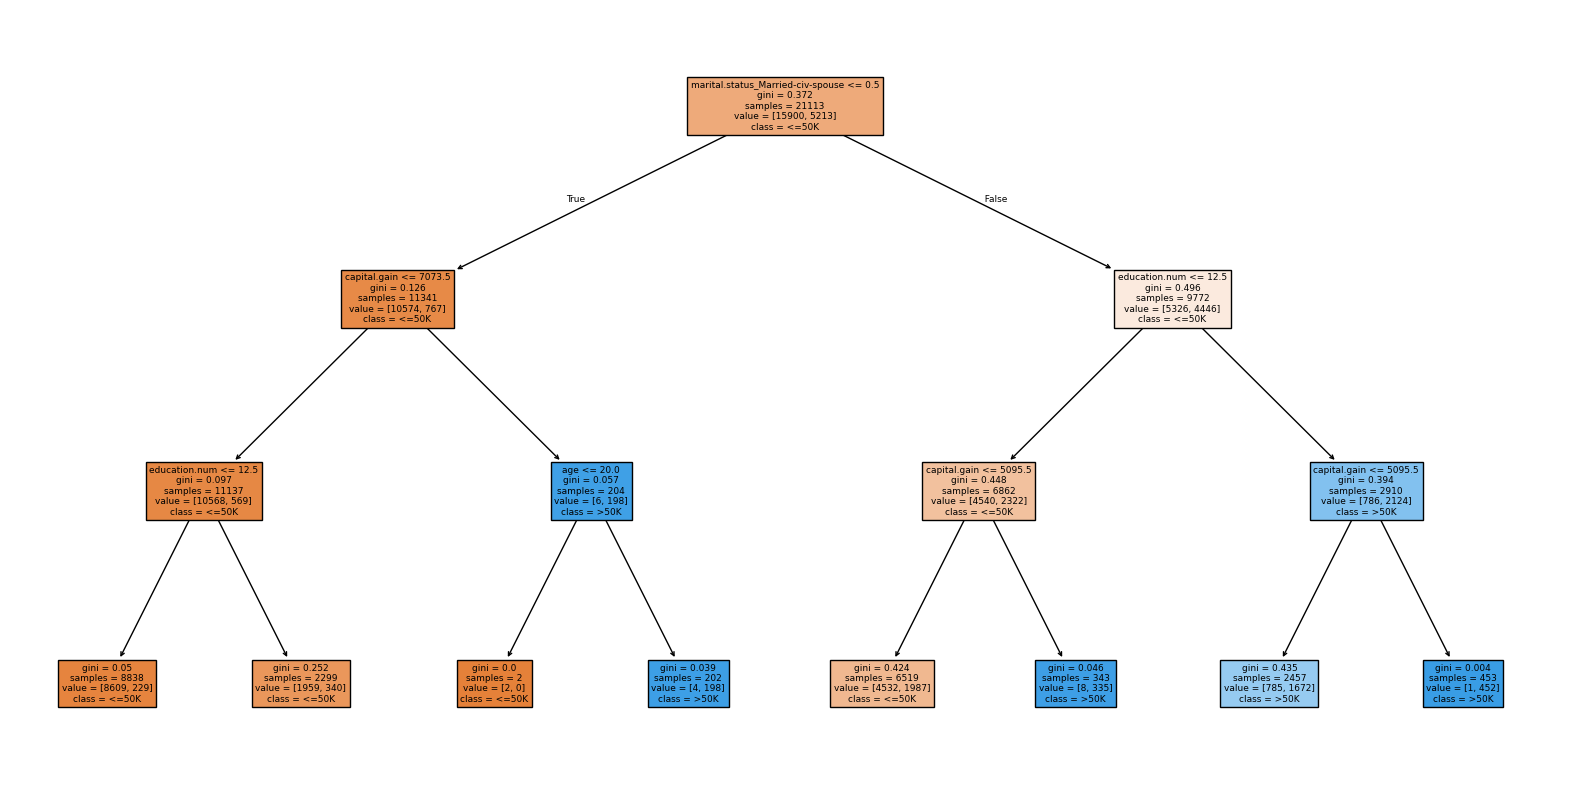

In [112]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    model,  
    feature_names=X.columns,
    class_names=['<=50K', '>50K'],
    filled=True
)
plt.show()

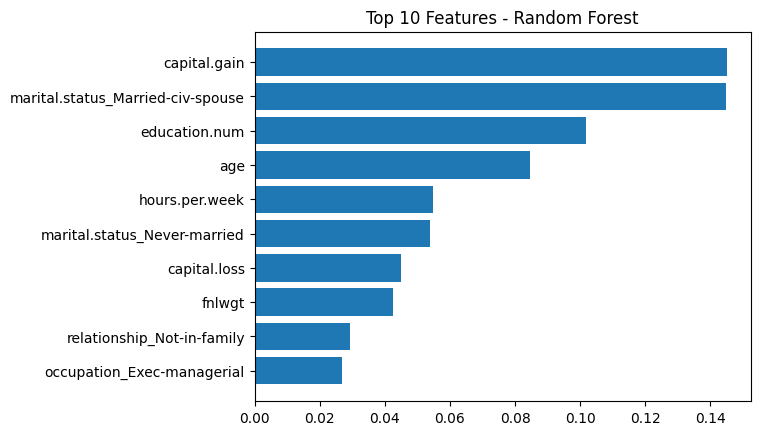

In [113]:
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
})

rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

plt.figure()
plt.barh(rf_importance['Feature'][:10], rf_importance['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Features - Random Forest")
plt.show()

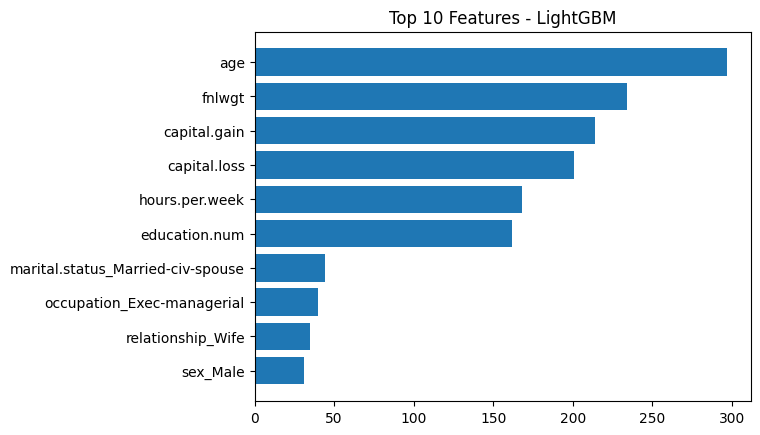

In [114]:
lgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_lgb.feature_importances_
})

lgb_importance = lgb_importance.sort_values(by='Importance', ascending=False)

plt.figure()
plt.barh(lgb_importance['Feature'][:10], lgb_importance['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Features - LightGBM")
plt.show()

In [115]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


#### SHAP values explain individual predictions by showing how each feature increases or decreases the model’s output.

/opt/homebrew/Cellar/jupyterlab/4.5.2/libexec/lib/python3.14/site-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


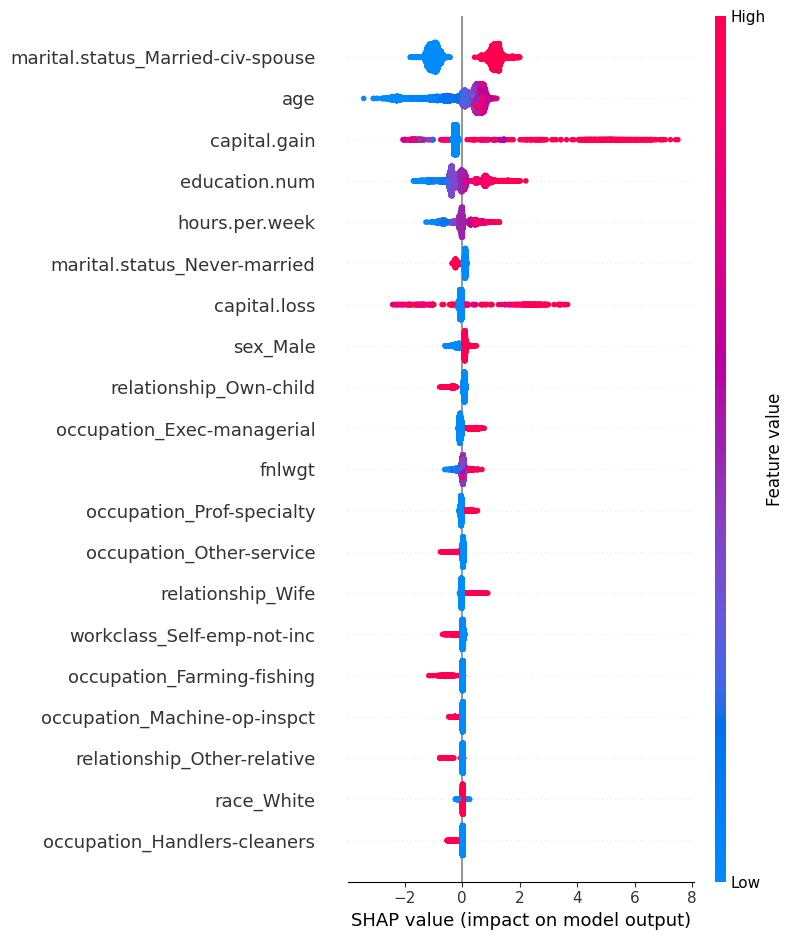

In [116]:
import shap

explainer = shap.TreeExplainer(best_lgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)